# Enron Dataset Analysis
## Udacity P5 Final Project 

### Jianru Shi





In [1]:
#!/usr/bin/python

import sys
import pickle
sys.path.append("../tools/")
from sklearn import preprocessing
from scipy.stats.mstats import normaltest
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.pipeline import Pipeline
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from tester import *
from select_models import *

/Users/ruru/anaconda/envs/myenv/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ruru/anaconda/envs/myenv/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary', 'deferral_payments',\
                 'total_payments', 'loan_advances', 'bonus',\
                 'restricted_stock_deferred', 'deferred_income',\
                 'total_stock_value', 'expenses', 'exercised_stock_options',\
                 'other', 'long_term_incentive', 'restricted_stock', 'director_fees',\
                'to_messages', 'from_poi_to_this_person',\
                 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    


In [3]:
print 'The number of observations:',len(data_dict), '\n' \
'The number of features:',  len(features_list)

The number of observations: 146 
The number of features: 20


In [4]:
# convert the dictionary to pandas dataframe for data wrangling and cleaning

data_df=pd.DataFrame.from_dict(data_dict,orient='index', dtype='float')
data_df[['poi']]=data_df[['poi']].astype('bool')
data_df=data_df.replace('NaN', np.nan) 


In [5]:
# missing values
data_df.isnull().sum()

salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       60
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                 35
from_poi_to_this_person       60
dtype: int64

In [6]:
# count labels frequencty
data_df['poi'].value_counts()

False    128
True      18
Name: poi, dtype: int64

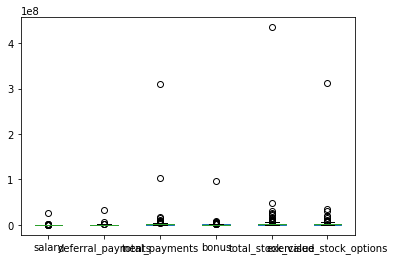

In [7]:
### Task 2: Remove outliers

## Visualize outliers in box-plot
data_df[['salary', 'deferral_payments','total_payments',\
         'bonus','total_stock_value', 'exercised_stock_options',]].plot.box()


In [8]:
## identify observations that contains outlier 

data_df[['total_stock_value', 'total_payments']].describe()

,total_stock_value,total_payments
count,1.260000e+02,1.250000e+02
mean,6.773957e+06,5.081526e+06
std,3.895777e+07,2.906172e+07
min,-4.409300e+04,1.480000e+02
25%,4.945102e+05,3.944750e+05
50%,1.102872e+06,1.101393e+06
75%,2.949847e+06,2.093263e+06
max,4.345095e+08,3.098866e+08


In [9]:
data_df[data_df['total_stock_value']>200000000]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
TOTAL,26704229.0,NaN,32083396.0,309886585.0,311764000.0,97343619.0,130322299.0,NaN,-7576788.0,434509511.0,...,83925000.0,NaN,42667589.0,NaN,False,1398517.0,-27992891.0,48521928.0,NaN,NaN


In [10]:
# Remove the row with errors
data_df.drop(['TOTAL'], inplace=True)

In [11]:
# Check the abnormal observations has negative total stock value
data_df[data_df['total_stock_value']<0]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
BELFER ROBERT,NaN,NaN,-102500.0,102500.0,3285.0,NaN,NaN,NaN,44093.0,-44093.0,...,NaN,NaN,NaN,NaN,False,3285.0,NaN,NaN,NaN,NaN


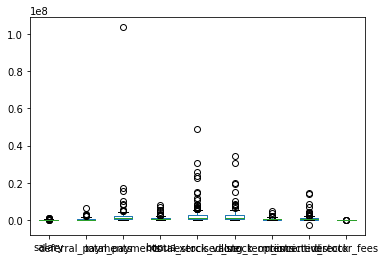

In [12]:
# plot the cleaned data 
data_df[['salary', 'deferral_payments','total_payments',\
         'bonus','total_stock_value', 'exercised_stock_options',\
        'long_term_incentive', 'restricted_stock', 'director_fees',]].plot.box()

In [13]:
# Check the outlier in total payments 
# keep the oberservation since Lay_Kennethl is a person name
data_df[data_df['total_payments']>100000000]

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
LAY KENNETH L,1072321.0,4273.0,202911.0,103559793.0,34348384.0,7000000.0,14761694.0,2411.0,NaN,49110078.0,...,81525000.0,36.0,10359729.0,16.0,True,NaN,-300000.0,3600000.0,kenneth.lay@enron.com,123.0


In [14]:
### Task 3: Create new feature(s)

data_df['to_poi_fraction']=data_df['from_this_person_to_poi']/data_df['from_messages']
data_df['from_poi_fraction']=data_df['from_poi_to_this_person']/data_df['to_messages']


### filled missing values with 0 
data_df=data_df.fillna(0)

In [35]:
### update the features_list by adding two new features
features_list = ['poi','salary', 'deferral_payments',
                 'total_payments', 'loan_advances', 'bonus',
                 'restricted_stock_deferred', 'deferred_income',
                 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'other', 'long_term_incentive', 'restricted_stock', 'director_fees',
                'to_messages', 'from_poi_to_this_person',
                 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi',
                'to_poi_fraction','from_poi_fraction'] 

In [16]:
### Store to my_dataset for easy export below.
data_dict=data_df.to_dict(orient='index')
my_dataset = data_dict

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)



from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [17]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.

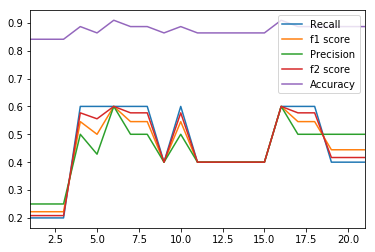

In [18]:
### Classifier_1 Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


evaluations=NB_selection(features_train, labels_train,features_test,labels_test)  
evalu_df=pd.DataFrame.from_dict(evaluations, orient='index')
evalu_df.plot()

In [18]:
from sklearn.model_selection import GridSearchCV
clf=NB_pipeline()
Params=NB_Params() 
grid_searcher = GridSearchCV(clf, param_grid=Params, cv=10, scoring='f1')
#grid_searcher = GridSearchCV(Tree_clf, param_grid=Tree_Params, cv=10, scoring='recall')


grid_searcher.fit(features_train, labels_train)
print 'The f1 score from Naive Bayes model is:', grid_searcher.best_score_
result_df=pd.DataFrame.from_dict(grid_searcher.cv_results_)
pd.DataFrame.from_dict(grid_searcher.best_params_, orient='index') 


/Users/ruru/anaconda/envs/myenv/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


The f1 score from Naive Bayes model is: 0.316666666667


,0
selection__k,13


In [19]:
### Final Naive Bayes Classifier
NB_clf=Pipeline([
    ('selection', SelectKBest(f_classif, k=13)),
    ('classification', GaussianNB())
])

In [21]:
### Classifier_2 Decision Tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV


clf=Tree_pipeline()
Params=Tree_Params() 
grid_searcher = GridSearchCV(clf, param_grid=Params, cv=10, scoring='f1')
#grid_searcher = GridSearchCV(Tree_clf, param_grid=Tree_Params, cv=10, scoring='recall')


grid_searcher.fit(features_train, labels_train)
print 'The f1 score from Decision Tree model is:', grid_searcher.best_score_
result_df=pd.DataFrame.from_dict(grid_searcher.cv_results_)
pd.DataFrame.from_dict(grid_searcher.best_params_, orient='index') 


The f1 score from Decision Tree model is: 0.363333333333


,0
classification__max_features,log2
selection__k,7
classification__min_samples_split,4
classification__criterion,entropy


In [22]:
### Final tree model
Tree_clf = Pipeline([
  ('selection', SelectKBest(f_classif, k=7)),
  ('classification', tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=4, random_state=42, max_features='log2'))
])


In [23]:
### Classifier_3 SVC

from sklearn.svm import SVC
from sklearn import preprocessing


clf=SVC_pipeline()
Params=SVC_Params()
grid_searcher = GridSearchCV(clf, param_grid=Params, cv=10, scoring='f1')
#grid_searcher = GridSearchCV(Tree_clf, param_grid=Tree_Params, cv=10, scoring='recall')

grid_searcher.fit(features_train, labels_train)
print 'The f1 score for SVC classifier is:', grid_searcher.best_score_

result_df=pd.DataFrame.from_dict(grid_searcher.cv_results_)
pd.DataFrame.from_dict(grid_searcher.best_params_, orient='index') 


The f1 score for SVC classifier is: 0.411333333333


,0
classification__gamma,100
classification__kernel,poly
classification__C,10
selection__k,7


In [24]:
### Final SVC model

SVC_clf=Pipeline([
    ('scaler', preprocessing.MinMaxScaler()),
    ('selection', SelectKBest(f_classif, k=7)),
    ('classification', SVC(kernel='poly', gamma=100, C=10, random_state=42) )
])


In [20]:
### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html


In [25]:
### Compare three models


NB_clf.fit(features_train,labels_train)
Tree_clf.fit(features_train,labels_train)
SVC_clf.fit(features_train,labels_train)


classifers_list=[NB_clf,Tree_clf,SVC_clf]
classifer_name_list=['Gaussian Naive Bayes','Decision Tree', 'SVC']

clf_scores={}
for ii in range(0, len(classifers_list)):
    classifier=classifers_list[ii]
    classifer_name=classifer_name_list[ii]
    pred=classifier.predict(features_test)
    scores=accuracy_check(pred, labels_test)
    scores_dict={'Accuracy': scores[0], 'Precision': scores[1],\
     'Recall':scores[2], 'f1':scores[3], 'f2':scores[4]}
    clf_scores[classifer_name]=scores_dict

pd.DataFrame.from_dict(clf_scores, orient='index')

#clf_scores

,f1,Recall,f2,Precision,Accuracy
Decision Tree,0.4,0.4,0.4,0.4,0.863636
Gaussian Naive Bayes,0.4,0.4,0.4,0.4,0.863636
SVC,0.4,0.6,0.5,0.3,0.795455


In [62]:

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.


clf=Tree_clf

full_features_list = ['poi','salary', 'deferral_payments',
                 'total_payments', 'loan_advances', 'bonus',
                 'restricted_stock_deferred', 'deferred_income',
                 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'other', 'long_term_incentive', 'restricted_stock', 'director_fees',
                'to_messages', 'from_poi_to_this_person',
                 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi',
                'to_poi_fraction','from_poi_fraction'] 

support=clf.named_steps['selection'].get_support()
features_list=list(np.array(full_features_list[1:])[support])
features_list=['poi']+features_list

dump_classifier_and_data(clf, my_dataset, features_list)

In [69]:
### Features importances
scores=clf.named_steps['classification'].feature_importances_

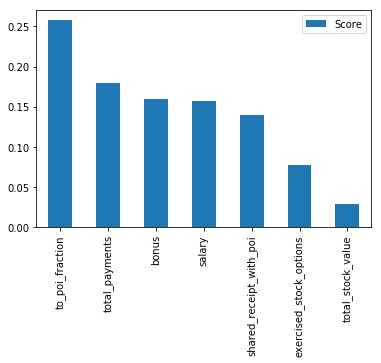

In [70]:
scores_dict={}
for i in range (0, len(scores)):
    feature_name=features_list[i+1]
    score=scores[i]
    scores_dict[feature_name]=score
scores_df=pd.DataFrame.from_dict(scores_dict, orient='index')
scores_df.columns=['Score']
scores_df.sort_values(['Score'], ascending=False).plot(kind='bar')